In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [46]:
df_forces = pd.read_csv(r"D:\Jojo\PhD\ClimbingRobot\ClimbingLizardForceAnalysis\Geckos_forces_sync_output_xy.csv", skipinitialspace=True)
print(df_forces.head())

### Count how many entries of which foot exist:
print("\n value counts:\n",df_forces["foot2"].value_counts())

### Print all column names:
print(df_forces.columns)

### Strip all white spaces from colnames:
df_forces.columns = df_forces.columns.str.replace(' ', '')
print("\n",df_forces.columns)

   Unnamed: 0            filename     MeanX     MeanY     MeanZ  IntergralX  \
0           6  hfren11_run_05.avi -0.007982  0.007503  0.002297   -0.000472   
1          12  hfren11_run_10.avi -0.004788  0.007168  0.002272   -0.000325   
2          24  hfren11_run_20.avi -0.006839  0.009931  0.003273   -0.000364   
3          28  hfren13_run_03.avi -0.008458  0.002753 -0.005411   -0.000252   
4          35  hfren13_run_07.avi -0.005210  0.003707  0.001632   -0.000152   

   IntergralY  IntergralZ      MinX      MinY  ...  individual  bodymass  SVL  \
0    0.000443    0.000136 -0.018300 -0.003086  ...     hfren11      2.75  426   
1    0.000486    0.000154 -0.015797 -0.006451  ...     hfren11      2.75  426   
2    0.000528    0.000174 -0.011920 -0.000896  ...     hfren11      2.75  426   
3    0.000082   -0.000161 -0.019919 -0.001680  ...     hfren13      3.25  419   
4    0.000108    0.000048 -0.012696 -0.003030  ...     hfren13      3.25  419   

       TL MeanX_rel MeanY_rel MeanZ_re

df_forces_means: 
   direction foot2 variable     value
0        up  fore    MeanZ  0.002297
1        up  fore    MeanZ  0.002272
2        up  fore    MeanZ  0.003273
3      down  fore    MeanZ -0.005411
4        up  fore    MeanZ  0.001632


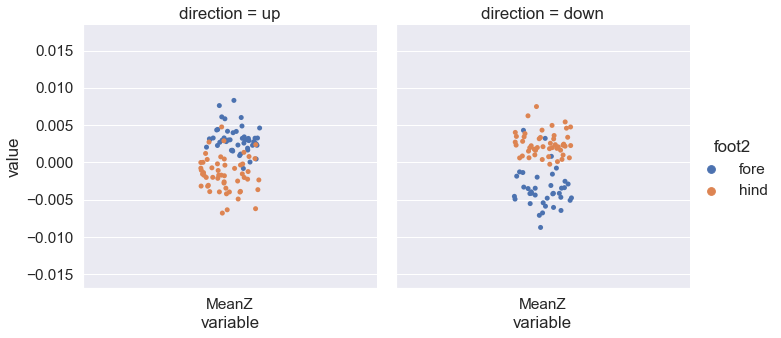

In [50]:
sn.set_style=("white")
sn.set(font_scale = 1.4)

# TODO: do this with seaborn boxplots so split by force and direction + facet grid foot

### Plot Z Mean:
df_forces_means = df_forces.melt(id_vars=["direction", "foot2"], value_vars=["MeanZ"])
print("df_forces_means: \n", df_forces_means.head())

sn.catplot(x="variable", y="value", data=df_forces_means, col="direction", hue="foot2")

In [52]:
df_forces_means_up = df_forces_means[df_forces_means["direction"] == "up"]
df_forces_means_down = df_forces_means[df_forces_means["direction"] == "down"]

df_forces_means_up_fore = df_forces_means_up[df_forces_means_up["foot2"] == "fore"]
df_forces_means_up_hind = df_forces_means_up[df_forces_means_up["foot2"] == "hind"]
df_forces_means_down_fore = df_forces_means_down[df_forces_means_down["foot2"] == "fore"]
df_forces_means_down_hind = df_forces_means_down[df_forces_means_down["foot2"] == "hind"]

print("df_forces_means UP: \n", df_forces_means_up.head())
print("df_forces_means DOWN: \n", df_forces_means_down.head())


#######
# GET THE MEAN AND SD VALUES
#######
up_fore_mean_Fz = round(np.nanmean(df_forces_means_up_fore["value"]), 6)
up_hind_mean_Fz = round(np.nanmean(df_forces_means_up_hind["value"]), 6)
down_fore_mean_Fz = round(np.nanmean(df_forces_means_down_fore["value"]), 6)
down_hind_mean_Fz = round(np.nanmean(df_forces_means_down_hind["value"]), 6)

up_fore_sd_Fz = round(np.nanstd(df_forces_means_up_fore["value"]), 6)
up_hind_sd_Fz = round(np.nanstd(df_forces_means_up_hind["value"]), 6)
down_fore_sd_Fz = round(np.nanstd(df_forces_means_down_fore["value"]), 6)
down_hind_sd_Fz = round(np.nanstd(df_forces_means_down_hind["value"]), 6)

print(f" up_fore_mean_Fz: {up_fore_mean_Fz}, \n up_hind_mean_Fz: {up_hind_mean_Fz}, \n down_fore_mean_Fz: {down_fore_mean_Fz}, \n down_hind_mean_Fz: {down_hind_mean_Fz}")
print(f" up_fore_sd_Fz: {up_fore_sd_Fz}, \n up_hind_sd_Fz: {up_hind_sd_Fz}, \n down_fore_sd_Fz: {down_fore_sd_Fz}, \n down_hind_sd_Fz: {down_hind_sd_Fz}")

df_forces_means UP: 
   direction foot2 variable     value
0        up  fore    MeanZ  0.002297
1        up  fore    MeanZ  0.002272
2        up  fore    MeanZ  0.003273
4        up  fore    MeanZ  0.001632
5        up  fore    MeanZ  0.002590
df_forces_means DOWN: 
    direction foot2 variable     value
3       down  fore    MeanZ -0.005411
7       down  fore    MeanZ -0.004372
9       down  fore    MeanZ -0.006033
11      down  fore    MeanZ -0.002893
13      down  fore    MeanZ -0.004216
 up_fore_mean_Fz: 0.003105, 
 up_hind_mean_Fz: -0.001577, 
 down_fore_mean_Fz: -0.003573, 
 down_hind_mean_Fz: 0.002494
 up_fore_sd_Fz: 0.001693, 
 up_hind_sd_Fz: 0.002303, 
 down_fore_sd_Fz: 0.002537, 
 down_hind_sd_Fz: 0.001595
